In [1]:
# pip install ftfy

In [2]:
import pandas as pd
pd.set_option('display.max_rows', None)
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import joblib
import ftfy
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pedro\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pedro\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
def ler_dados(nome_arquivo_csv):
    reamostragem = pd.read_csv('dados_para_treinamento.csv')
    dados = pd.read_csv(nome_arquivo_csv)
    dados = dados.dropna()
    dados['Comentarios'] = dados['Comentarios'].apply(ftfy.fix_text)
    tamanho = len(dados)
    del reamostragem['Rotulo']
    dados_mais_reamostragem = pd.concat([reamostragem, dados]).reset_index(drop=True)
    return dados_mais_reamostragem, tamanho

In [4]:
def tokeniza(dataset):
    dataset.dropna(subset=['Comentarios'], inplace=True)
    dataset.reset_index(drop=True, inplace=True)
    dataset['tokens'] = dataset['Comentarios'].apply(lambda x: word_tokenize(x.lower()))
    return dataset

In [5]:
def limpa(dataset):
    for i, tokens in enumerate(dataset['tokens']):
        dataset['tokens'][i] = [token for token in tokens if token.isalpha()]
    return dataset

In [6]:
def removeStopWords(dataset):
    stop_words_pt = set(stopwords.words('portuguese'))
    stop_words_pt.remove('não')
    for i, tokens in enumerate(dataset['tokens']):
        dataset['tokens'][i] = [token for token in tokens if token not in stop_words_pt]
    return dataset

In [7]:
def vetoriza(dataset):
    tfidf = TfidfVectorizer(max_features=6272)
    tokens_vetorizados = tfidf.fit_transform(dataset['tokens'].apply(lambda x: ' '.join(x)))
    return tokens_vetorizados

In [13]:
def resultado(matrizVetores, dados):
    SVM = joblib.load('randomForest.pkl')
    rotulos = SVM.predict(matrizVetores)
    rotulos_df = pd.DataFrame(rotulos, columns=['Rotulos'])
    dataframe = pd.concat([dados, rotulos_df], axis=1)
    dataframe['Rotulos'] = dataframe['Rotulos'].replace({
        0:'Não atendeu as expectativas',
        1:'Satisfeito',
        2:'Surgimento de um Problema'
    })
    return dataframe

In [14]:
def resultado_final(resultado_reamostragem, tamanho):
    resultado_final = resultado_reamostragem[-tamanho:]
    resultado_final = resultado_final.reset_index(drop=True)
    resultado_reamostragem.to_csv('resultados_randomForest', index=False)
    return resultado_final

In [15]:
def executa(nome_arquivo_csv):
    dados, tamanho = ler_dados(nome_arquivo_csv)
    dados_tokenizados = tokeniza(dados)
    dados_limpos = limpa(dados_tokenizados)
    dados_palavras_importantes = removeStopWords(dados_limpos)
    matrizVetorada = vetoriza(dados_palavras_importantes)
    resultado_reamostragem = resultado(matrizVetorada, dados_palavras_importantes['Comentarios'])
    resultadoFinal = resultado_final(resultado_reamostragem, tamanho)
    
    contagem = resultadoFinal['Rotulos'].value_counts(normalize=True) * 100
    plt.figure(figsize=(16, 6))
    ax = sns.barplot(x=contagem.index, y=contagem.values, palette='flare')
    ax.set_yticklabels([])
    ax.set_ylim(top=105)
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', fontsize=20)

    plt.xlabel('')
    plt.ylabel('Quantidade de Comentários', fontsize = 20)
    plt.title('Classificação de Comentários de '+nome_arquivo_csv, fontsize = 20)
    plt.xticks(fontsize=20)
    plt.show()
    return resultadoFinal

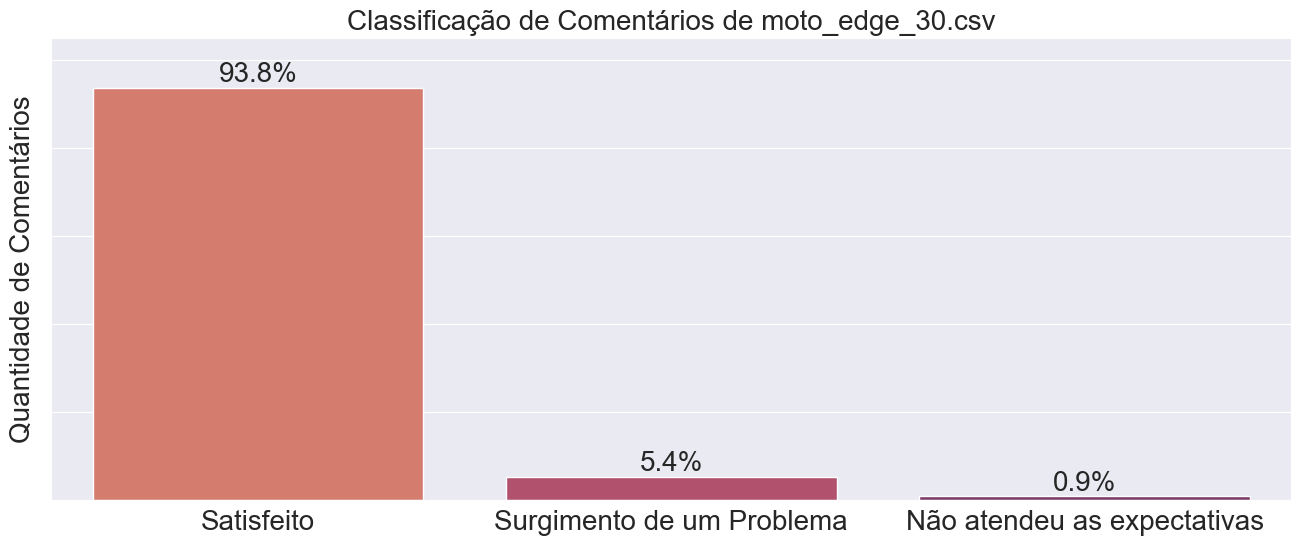

In [16]:
rotulos = executa('moto_edge_30.csv')

In [17]:
rotulos

Comentarios  \
0    Este celular é incrível, de longe o melhor cel...   
1    Dentre os telefones da linha edge 30, é o melh...   
2                                       Ótimo produto.   
3                            Produto top ,superindico.   
4    Muito lindo , belo design muito bom , bom pra ...   
5    O aparelho é bem leve, de fácil manuseio e exc...   
6    Sempre usei motorola, mas nunca dá linha edge....   
7             Excelente custo benefício, recomendo !!.   
8              Motorola edge 30 neo excelente produto.   
9    Pra mim que saiu do iphone foi uma libertação ...   
10   Aparelho muito bom! tem lindo desing e é bem l...   
11   Tirando a bateria que não dura muito, o super ...   
12                                            Toppppp.   
13                                 Até agora tudo blz.   
14   Eu uso pouco o celular, por isso a bateria dur...   
15   Amei meu smartphone, até o presente momento nã...   
16                                         Gostei 👏👏👏.   
17   Celular muito bom,só deixa desejar na bateria ...   
18   Telefone em si é bom, porém pra tirar foto pel...   
19   Celular apresentou defeito ao ser iniciado. Fi...   
20                                        Maravilhoso.   
21       Gostei, ficou dentro das minhas expectativas.   
22   Não é um celular no padrão de um edge 30, mas ...   
23   Produto muito bom. Custo benefício legal.\nVel...   
24                    Achei que a bateria durava mais.   
25          Produto muito bom carregador super rapido.   
26     Celular muito bom, rápido e de muita qualidade.   
27           Pelo custo benefício,e um ótimo telefone.   
28   Excelente smartphone o melhor que já tive, óti...   
29             Amei. Recomendo. Cumprindo o prometido.   
30   Desde a linha z da motorola sou fã incondicion...   
31   Celular rápido, leve e não e tão grande. Ótima...   
32                                Esperava mais dele!.   
33   Eu esperei completar uma semana de usso para a...   
34                         Celular é top das galáxias.   
35                                           Perfeito.   
36              Excelente produto, compacto e potente.   
37                            Atendeu as espectativas.   
38   Dei o celular de presente para a minha esposa ...   
39                            Maravilhoso 😍 tô amando.   
40                                Olha amei muito bom.   
41                                     Ótimo aparelho.   
42                                              Ótimo.   
43                                          Muito top.   
44            Produto top, leve e com muita qualidade.   
45   Esse celular é de intermediário para top. A pr...   
46   Excelente,rápido,bateria dura no mínimo 24hs,o...   
47                                          Muito bom.   
48                   Eu achei pequeno particularmente.   
49   Excelente opção custo beneficio, gostei demais...   
50                        Superou minhas espectativas.   
51   Muito top gostei demais dele bateria dura p ca...   
52       Ótimo aparelho, fácil de usar e muito rápido.   
53    Excelente aparelho. Superou minhas expectativas.   
54     A bateria deixa a desejar. Não dura 1 dia todo.   
55   Ótimo custo benefício, a bateria não dura muit...   
56   Única coisa que tenho de ponto negativo e que ...   
57   O produto é bom, infelizmente o carregador fun...   
58     Ótimo estou bem contente ! excelente celular !.   
59                              Ótimo custo benefício.   
60   Estou muito satisfeito veio tudo certo celular...   
61                                      Excelente 😀😀😀.   
62                 Satisfeito com o produto adquirido.   
63                                          Muito bom.   
64   Aparelho sensacional. Carga inacreditáveis 30 ...   
65                                  Super amei ele ❤️.   
66                                          Excelente.   
67                              Ótimo custo benefício.   
68   Celular muito bom,rápida resposta no